# ESAME DI ORGANIZZAZIONI E SOCIETÀ DIGITALI (COMPUTER & SOCIETY) 

## _Appello del 29/11/2021  <br>Tempo a disposizione: 2 ore_ <br>
## NOME COGNOME: ................................................. 
(PER LA CONSEGNA LO STUDENTE SCRIVA IL PROPRIO NOME E COGNOME)

Gli studenti svolgano i punti descritti di seguito. Le risposte dovranno essere consegnate come **Jupyter Notebook** e come **pagina html** (usare il menù **File - Export Notebook as ... - Export Notebook as HTML**)

### PUNTO 1

Si usi il dataset **Animali_Urbani.csv** fornito come materiale d'esame. Il dataset presenta dati relativi a delle hit musicali in un arco di tempo di diversi anni. La descrizione delle colonne richieste è riportata nella tabella seguente.

| Variabile | Descrizione |
| :--------: | :---------: |
| **Borough** | Quartiere di NY |
| **Species Description** | Specie dell'animale |
| **Species Status** | Specie domestica o selvatica |
| **Animal Condition** | Stato di salute dell'animale |
| **Duration of Response** | Durata dell'intervento |
| **Age** | Fascia di età dell'animale |
| **Animal Class** | Tipologia generale |

#### **PUNTO 1)** 
1. Importare le librerie standard (istruzioni e output)
2. Leggere il dataset **Animali_Urbani.csv** selezionando solo le colonne elencate nella precedente tabella e salvare nel data frame di lavoro **animali**
3. Rinominare le colonne con nomi in italiano e convenienti per l'analisi

**1.1**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

**1.2**

In [84]:
animali = pd.read_csv('Animali_Urbani.csv', sep =";", decimal=",", encoding='Latin-1', 
           usecols=['Borough', 'Species Description', 'Species Status', 'Animal Condition', 
                    'Duration of Response', 'Age', 'Animal Class'])
animali

,Borough,Species Description,Species Status,Animal Condition,Duration of Response,Age,Animal Class
0,Brooklyn,Chukar,Exotic,Healthy,6.00,Adult,Birds
1,Bronx,Sparrow,Native,Healthy,1.75,Infant,Birds
2,Bronx,White-tailed Deer,Native,NaN,1.00,Juvenile,Deer
3,Staten Island,Raccoon,Native,NaN,2.00,Adult;#Juvenile,Small Mammals-RVS
4,Queens,Virginia Opossum,Native,Healthy,2.25,Juvenile,Small Mammals-non RVS
...,...,...,...,...,...,...,...
2604,Manhattan,Raccoon,Native,Healthy,0.75,Adult,Small Mammals-RVS
2605,Manhattan,Raccoon,Native,Injured,1.25,Juvenile,Small Mammals-RVS
2606,Manhattan,Raccoon,Native,DOA,1.50,Juvenile,Small Mammals-RVS
2607,Manhattan,Raccoon,Native,Healthy,0.75,Adult,Small Mammals-RVS


**1.3**

In [85]:
animali=animali.rename(columns={'Borough':'Quartiere','Species Description':'Nome', 'Species Status':'Tipo', 
                        'Animal Condition':'Stato','Duration of Response':'Durata', 'Age':'Eta', 'Animal Class':'Classe'})
animali

,Quartiere,Nome,Tipo,Stato,Durata,Eta,Classe
0,Brooklyn,Chukar,Exotic,Healthy,6.00,Adult,Birds
1,Bronx,Sparrow,Native,Healthy,1.75,Infant,Birds
2,Bronx,White-tailed Deer,Native,NaN,1.00,Juvenile,Deer
3,Staten Island,Raccoon,Native,NaN,2.00,Adult;#Juvenile,Small Mammals-RVS
4,Queens,Virginia Opossum,Native,Healthy,2.25,Juvenile,Small Mammals-non RVS
...,...,...,...,...,...,...,...
2604,Manhattan,Raccoon,Native,Healthy,0.75,Adult,Small Mammals-RVS
2605,Manhattan,Raccoon,Native,Injured,1.25,Juvenile,Small Mammals-RVS
2606,Manhattan,Raccoon,Native,DOA,1.50,Juvenile,Small Mammals-RVS
2607,Manhattan,Raccoon,Native,Healthy,0.75,Adult,Small Mammals-RVS


#### **PUNTO 2)** 
Effettuare l'analisi preliminare del dataset:
1. Determinare se esistono valori mancanti NaN/None (istruzioni e output)
2. Per le colonne dove risultano esserci dei valori mancanti, determinare il numero di righe
3. Mostrare i tipi di dato associati alle colonne (istruzioni e output)
    <br>Ci sono colonne il cui tipo di dato va necessariamente corretto?

**2.1**

In [86]:
animali.isnull().any()

Quartiere    False
Nome         False
Tipo          True
Stato         True
Durata       False
Eta          False
Classe       False
dtype: bool

**2.2**

In [87]:
animali['Tipo'].isnull().sum()

16

In [88]:
animali['Stato'].isnull().sum()

390

**2.3**

In [89]:
animali.dtypes

Quartiere     object
Nome          object
Tipo          object
Stato         object
Durata       float64
Eta           object
Classe        object
dtype: object

*ATTENZIONE, COMMENTO: in questo caso i tipi di dato sono tutti coerenti perchè nella lettura del dataset si è usato il parametro decimal="," per specificare che la virgola andava interpretata come segno decimale. La trasformazione in . viene fatta automaticamente per valori di Durata e interpretati come numeri (float).
<br> Diversamente, se non si specifica, i valori vengono letti con la virgola e interpretati come alfanumerici (object), quindi vanno trasformati manualmente, prima sostituendo le virgole con punti, poi convertendo il formato da alfanumerico a float.*

#### **PUNTO 3)** 
Dal data frame **animali** ricavare:
1. Per ogni quartiere, il numero di interventi ordinato in maniera decrescente
2. Il numero di interventi ordinato in maniera decrescente di ogni specie di animali per ogni quartiere
3. Dal risultato del punto 2 ricavare un dataframe con tre colonne (\<quartiere>,\<nome della specie>,\<numero interventi>) 

**3.1**

In [91]:
animali.groupby(['Quartiere']).size().sort_values(ascending = False)

Quartiere
Manhattan        960
Brooklyn         461
Queens           458
Staten Island    452
Bronx            278
dtype: int64

**3.2 e 3.3**

In [92]:
#VERSIONE 1
animali.groupby(['Quartiere', 'Nome']).size().reset_index(name='numero').sort_values(by=['numero'],ascending = False)

,Quartiere,Nome,numero
205,Manhattan,Raccoon,409
108,Brooklyn,Raccoon,172
291,Queens,Raccoon,144
210,Manhattan,Red-tailed Hawk,83
321,Staten Island,Canada Goose,64
...,...,...,...
186,Manhattan,Honey Bee,1
188,Manhattan,Hummingbird,1
190,Manhattan,Koi,1
195,Manhattan,Mourning Dove,1


In [70]:
#VERSIONE 2
animali.groupby(['Quartiere', 'Nome'])[['Tipo']].count().sort_values(by=['Tipo'],ascending = False).reset_index()

,Quartiere,Nome,Tipo
0,Manhattan,Raccoon,409
1,Brooklyn,Raccoon,172
2,Queens,Raccoon,144
3,Manhattan,Red-tailed Hawk,83
4,Staten Island,Canada Goose,64
...,...,...,...
388,Brooklyn,Mouse (Unknown),0
389,Brooklyn,Snake (Unknown),0
390,Bronx,Turtle (Unknown),0
391,Brooklyn,Turtle (Unknown),0


#### **PUNTO 4)** 
Dal data frame **animali** ricavare:
1. Per ogni quartiere e specie, la durata massima e media e il numero di interventi; selezionare solo i casi con più di 10 interventi e ordinare per durata media in modo decrescente.  

**4.1**

In [108]:
a1=animali.groupby(['Quartiere', 'Nome'])['Durata'].agg([max,np.mean, np.size])
a1

max       mean  size
Quartiere     Nome                                                  
Bronx         Alligator Snapping Turtle        1.00   1.000000     1
              American Crow                    1.50   1.500000     1
              American Kestrel                 1.50   1.500000     1
              American Robin                   1.00   1.000000     1
              Argentine Black and White Tegu  10.00  10.000000     1
...                                             ...        ...   ...
Staten Island White-tailed Deer                6.00   1.548980    49
              White-throated Sparrow           0.75   0.300000     7
              Wild Turkey                      1.50   0.805556     9
              Wood Thrush                      2.25   2.250000     1
              Yellow-bellied Slider            3.75   3.750000     1

[393 rows x 3 columns]

In [109]:
a1.columns

Index(['max', 'mean', 'size'], dtype='object')

In [115]:
a1[a1['size']>10].sort_values(by='mean', ascending=False)

max      mean  size
Quartiere     Nome                                           
Staten Island Great Blue Heron          13.00  2.466667    15
Queens        Dog                        3.00  2.062500    20
Staten Island Double-crested Cormorant   4.00  1.861111    18
Brooklyn      Red-tailed Hawk           12.00  1.850000    15
Queens        Mute Swan                  4.00  1.818182    22
              Domestic Duck              4.00  1.807692    13
Manhattan     Cat                        4.00  1.750000    13
Bronx         Virginia Opossum           3.00  1.708333    12
Queens        Herring Gull               3.00  1.708333    12
              Raccoon                    5.50  1.684028   144
Manhattan     Red-tailed Hawk            6.00  1.633735    83
Bronx         White-tailed Deer          4.00  1.616667    15
Staten Island Raccoon                    5.00  1.581111    45
Brooklyn      Chicken                    3.00  1.576923    13
              Raccoon                   21.00  1.574419   172
              Canada Goose               3.50  1.555556    18
Bronx         Chicken                    3.00  1.554167    12
Staten Island White-tailed Deer          6.00  1.548980    49
              Domestic Duck             12.00  1.525000    30
Queens        Chicken                    3.25  1.462500    20
              Red-tailed Hawk            4.00  1.446429    14
Brooklyn      Mute Swan                  3.50  1.433333    15
Manhattan     Double-crested Cormorant   4.00  1.366667    15
Bronx         Cat                        7.00  1.356250    16
Manhattan     Dog                        3.00  1.340909    11
Bronx         Raccoon                    3.00  1.332292    48
Queens        Eastern Gray Squirrel      3.00  1.295455    11
Bronx         Striped Skunk              3.00  1.269231    13
Queens        Cat                        2.50  1.250000    13
Manhattan     Raccoon                    5.00  1.248655   409
Brooklyn      Cat                        4.00  1.242500    20
Queens        Canada Goose               3.50  1.215385    26
Brooklyn      Virginia Opossum           2.00  1.211538    13
Manhattan     Mallard Duck               6.50  1.183784    37
Brooklyn      Dog                        2.50  1.178571    14
Manhattan     Chicken                    2.20  1.177778    18
Staten Island Herring Gull               4.50  1.140625    16
Brooklyn      Eastern Gray Squirrel      4.00  1.092593    27
Bronx         Mute Swan                  3.00  1.076471    17
Manhattan     Canada Goose               3.00  1.037234    47
              Virginia Opossum           3.00  0.982143    14
Brooklyn      Bird (Unknown)             2.00  0.982143    14
Bronx         Canada Goose               3.25  0.959091    22
Staten Island Canada Goose               4.00  0.949219    64
              Common Snapping Turtle     3.00  0.910714    14
              Mallard Duck               2.00  0.900000    14
Manhattan     Eastern Gray Squirrel      2.50  0.782558    43
              American Robin             1.50  0.706250    16
              Red-eared Slider           2.00  0.628947    19
              Rock Dove                  1.50  0.544118    17

2. Per ogni condizione di salute e nome della specie, calcolare la durata massima e media e il numero di interventi; selezionare solo i casi con più di 20 interventi e ordinare rispetto il nome della specie.
Salvare il risultato. 
3. Dal risultato del punto precedente ricavare il data frame con 5 colonne: (\<condizione di salute>, \<nome specie>, \<durata massima>, \<durata media>, \<numero interventi>)

**4.2**

In [126]:
animali_stato=animali.groupby(['Stato', 'Nome'])['Durata'].agg([max,np.mean, np.size]).query('size>20').sort_index(level='Nome')
animali_stato

max      mean  size
Stato     Nome                                        
Healthy   Canada Goose            3.25  0.998148    27
Injured   Canada Goose            3.50  1.083333    87
Unhealthy Canada Goose            4.00  1.771739    23
Healthy   Cat                     4.00  1.382692    26
          Chicken                 3.25  1.470238    42
          Dog                     3.00  1.661290    31
          Domestic Duck          12.00  1.900000    40
DOA       Eastern Gray Squirrel   4.00  0.710000    25
Injured   Eastern Gray Squirrel   2.50  1.250000    26
          Herring Gull            3.00  1.395000    30
Healthy   Mallard Duck            6.50  1.294286    35
Injured   Mallard Duck            3.50  1.318519    27
          Mute Swan               3.50  1.592857    21
DOA       Raccoon                 5.00  1.090206    97
Healthy   Raccoon                 5.50  1.033740   123
Injured   Raccoon                 4.50  1.445652    46
Unhealthy Raccoon                21.00  1.753440   436
Healthy   Red-eared Slider        5.15  0.901923    26
          Red-tailed Hawk         4.50  1.280000    35
Injured   Red-tailed Hawk         5.00  1.795000    40
Unhealthy Red-tailed Hawk         6.00  2.477273    22
Injured   Rock Dove               3.50  1.136957    23
Healthy   Virginia Opossum        3.00  1.130000    25
Injured   White-tailed Deer       5.50  2.080000    30

**4.3**

In [134]:
animali_stato=animali_stato.reset_index()
animali_stato

,index,Stato,Nome,max,mean,size
0,0,Healthy,Canada Goose,3.25,0.998148,27
1,1,Injured,Canada Goose,3.50,1.083333,87
2,2,Unhealthy,Canada Goose,4.00,1.771739,23
3,3,Healthy,Cat,4.00,1.382692,26
4,4,Healthy,Chicken,3.25,1.470238,42
5,5,Healthy,Dog,3.00,1.661290,31
6,6,Healthy,Domestic Duck,12.00,1.900000,40
7,7,DOA,Eastern Gray Squirrel,4.00,0.710000,25
8,8,Injured,Eastern Gray Squirrel,2.50,1.250000,26
9,9,Injured,Herring Gull,3.00,1.395000,30


#### **PUNTO 5)** 
Usare il dataset **PUNTO4.csv** dal materiale d'esame (corrisponde al data frame prodotto al punto 4.3)
1. Si vuole aggiungere una colonna con i nomi delle specie in italiano. Il dataset **animalist.csv** fornito nel materiale d'esame contiene le associazioni. 
2. Rimuovere le colonne doppie dal risultato

**5.1 e 5.2**

In [131]:
animalist=pd.read_csv('animalist.csv', sep =",", encoding='Latin-1', 
           usecols=['Species_EN', 'Species_IT'])
animalist

,Species_EN,Species_IT
0,Alligator Snapping Turtle,Tartaruga alligatore
1,American Robin,Pettirosso americano
2,American Alligator,Alligatore americano
3,American Bullfrog,Rana toro
4,American Coot,Folaga americana
...,...,...
197,Wren,Scricciolo
198,Yellow-bellied Sapsucker,Picchio panciagialla
199,Yellow-bellied Slider,Tartaruga palustre americana
200,Yellow-crowned Night Heron,Nitticora capogiallo


In [139]:
animali_stato.merge(animalist, how='left', left_on='Nome', right_on='Species_EN').drop('Nome', axis=1)

,index,Stato,max,mean,size,Species_EN,Species_IT
0,0,Healthy,3.25,0.998148,27,Canada Goose,Oca Canadese
1,1,Injured,3.50,1.083333,87,Canada Goose,Oca Canadese
2,2,Unhealthy,4.00,1.771739,23,Canada Goose,Oca Canadese
3,3,Healthy,4.00,1.382692,26,Cat,Gatto
4,4,Healthy,3.25,1.470238,42,Chicken,Pollo
5,5,Healthy,3.00,1.661290,31,Dog,Cane
6,6,Healthy,12.00,1.900000,40,Domestic Duck,Anatra domestica
7,7,DOA,4.00,0.710000,25,Eastern Gray Squirrel,Scoiattolo grigio orientale
8,8,Injured,2.50,1.250000,26,Eastern Gray Squirrel,Scoiattolo grigio orientale
9,9,Injured,3.00,1.395000,30,Herring Gull,Gabbiano reale nordico


#### **PUNTO 6)**
Visualizzare: 
1. Usando il dataframe **PUNTO4.csv** produrre una visualizzazione per facets rispetto ai valori dello stato di salute degli animali; ogni facet conterrà il grafico a barre del valore della media degli interventi per specie di animale.
<br>Disporre i facet su due colonne e assicurare la leggibilità dei valori degli assi cartesiani.
2. Usando il dataframe **interventi.csv**, disponibile nel materiale d'esame, produrre lo scatterplot degli interventi sulle diverse specie di animali rispetto ai quartieri. 
<br>La dimensione dei punti dovrà variare con il numero di interventi, mentre la media della durata degli interventi sarà rappresentata da un gradiente di colore dei punti.
<br>Assicurare la leggibilità dei valori degli assi cartesiani.

**2.a.1**

In [142]:
animali_stato

,index,Stato,Nome,max,mean,size
0,0,Healthy,Canada Goose,3.25,0.998148,27
1,1,Injured,Canada Goose,3.50,1.083333,87
2,2,Unhealthy,Canada Goose,4.00,1.771739,23
3,3,Healthy,Cat,4.00,1.382692,26
4,4,Healthy,Chicken,3.25,1.470238,42
5,5,Healthy,Dog,3.00,1.661290,31
6,6,Healthy,Domestic Duck,12.00,1.900000,40
7,7,DOA,Eastern Gray Squirrel,4.00,0.710000,25
8,8,Injured,Eastern Gray Squirrel,2.50,1.250000,26
9,9,Injured,Herring Gull,3.00,1.395000,30


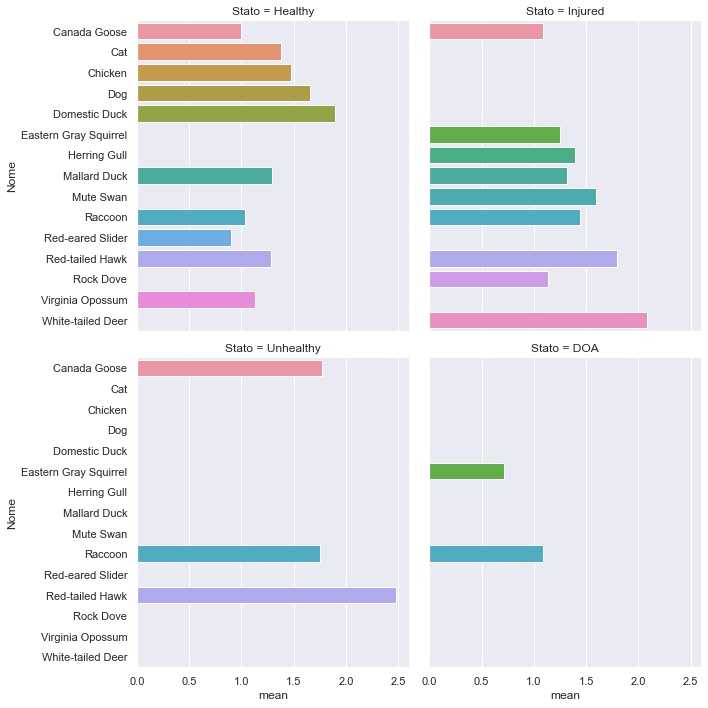

In [201]:
sns.catplot(y="Nome", x="mean", data=animali_stato, col="Stato", col_wrap=2,kind="bar")

In [167]:
interventi=pd.read_csv("interventi.csv")
interventi

,quartiere,specie,num_interventi,max_durata,media_durata
0,Staten Island,Great Blue Heron,15,13.00,2.466667
1,Queens,Dog,20,3.00,2.062500
2,Staten Island,Double-crested Cormorant,17,4.00,1.867647
3,Brooklyn,Red-tailed Hawk,15,12.00,1.850000
4,Queens,Mute Swan,22,4.00,1.818182
5,Queens,Domestic Duck,13,4.00,1.807692
6,Manhattan,Cat,13,4.00,1.750000
7,Bronx,Virginia Opossum,12,3.00,1.708333
8,Queens,Herring Gull,12,3.00,1.708333
9,Queens,Raccoon,144,5.50,1.684028


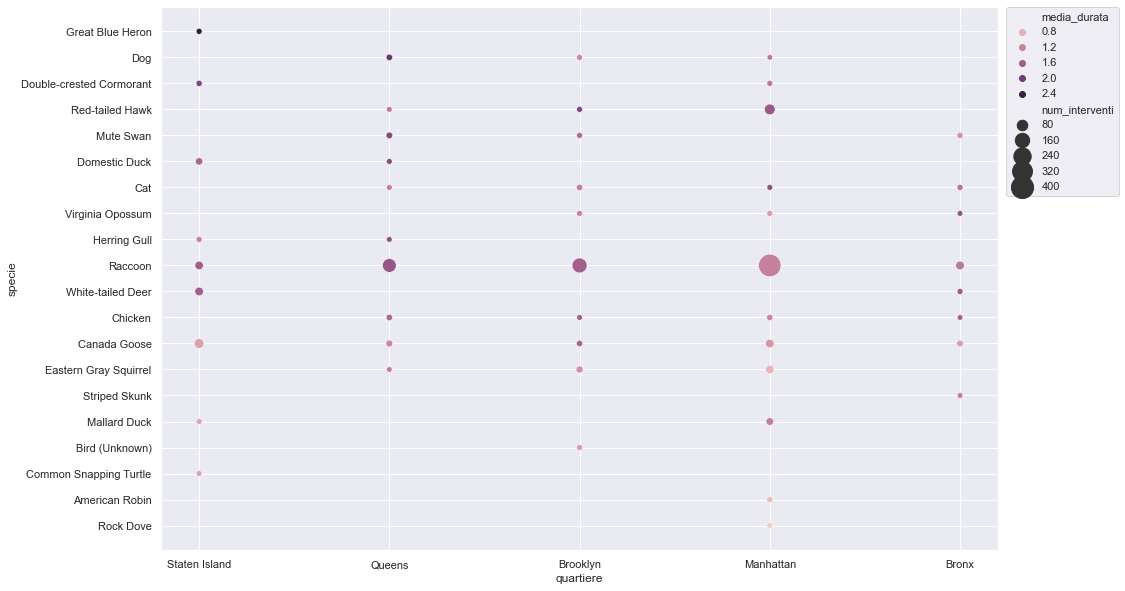

In [195]:
fig, ax = plt.subplots(figsize=(15,10))
fig=sns.scatterplot(x="quartiere", y="specie", size="num_interventi", sizes=(30, 500), hue="media_durata" ,data=interventi, ax=ax)
plt.legend(bbox_to_anchor=(1.01, 1.0), loc='upper left', borderaxespad=0)
plt.show()

## LEGGERE BENE - ISTRUZIONI PER LA CONSEGNA 

Per la consegna, seguire i seguenti passi:
1. SCRIVERE NOME COGNOME DENTRO il NOTEBOOK JUPYTER
2. SALVARE IL NOTEBOOK (da JUPYTER LAB, menù File - Salva Notebook come) CON IL PROPRIO COGNOME NEL NOME DEL FILE (ESEMPIO **Rossi_Esame29112021.ipynb**)
3. ESPORTARE IL NOTEBOOK COME FILE HTML (da JUPYTER LAB, menù File - Salva ed Esporta Notebook come - HTML), DARE STESSO NOME DEL FILE PRECEDENTE (ESEMPIO **Rossi_Esame29112021.html**)
3. AVVISARE IL DOCENTE CHE SI VUOLE CONSEGNARE E ATTENDERE LE ISTRUZIONI PER RICEVERE IL LINK
4. APRIRE LA PAGINA USANDO IL LINK RICEVUTO
5. FARE UPLOAD DEI DUE FILE UNA SOLA VOLTA. IN CASO DI ERRORE AVVERTIRE IL DOCENTE.
6. ATTENDERE CHE IL DOCENTE VERIFICHI I FILE CARICATI
<br><br>**ATTENZIONE**: IL MANCATO CARICAMENTO DEI FILE, IL CARICAMENTO DI UN FILE DI TIPO DIVERSO O L’ASSENZA DEL COGNOME, CONSEGNE MULTIPLE SARANNO TUTTI CONSIDERATI COME MANCATA CONSEGNA